In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [107]:
#Observed Data

#how many users visited the website
num_visitors = 20 

#Only 15 people bought clothes. 
obs = 5

# Prior distribution. This can be changed.
n_samp = 1e5


#Future expected visitors. Find the expected number of buyers based on observed data
num_future = 5000

In [108]:
#Assume a Uniform Prior
prior_distrib = pd.Series(np.random.uniform(0,1,size = n_samp))

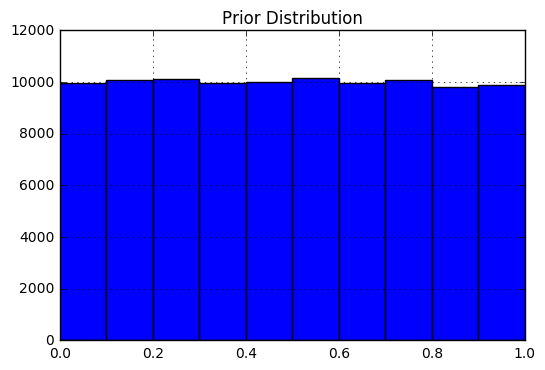

In [109]:
prior_distrib.hist()
plt.title('Prior Distribution')
plt.show()

In [110]:
success = []
#Likelihood
#Simulate for number of samples in the prior distribution, how much success we would have each time
#This is modeled as a binomial distribution
#This is the generator function

for i in prior_distrib:
    prob_success =  np.random.binomial(num_visitors, i)
    success.append(prob_success)

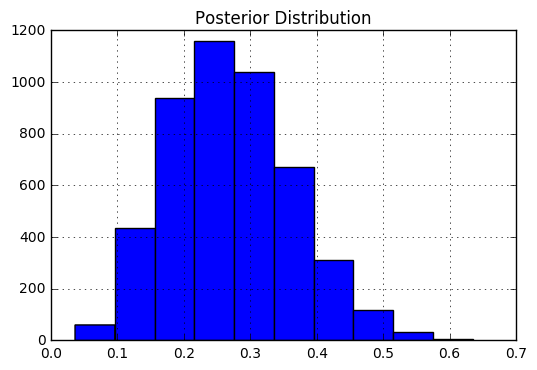

In [111]:
#Posterior Distribution
#Filter the results out based on the observed value
post_distrib = prior_distrib[list(map(lambda x: x == obs, success))]
post_distrib.hist()
plt.title('Posterior Distribution')
plt.show()

In [112]:
print('Size of Posterior Dist: %d' % len(post_distrib) )
print('Mean of Posterior Dist: %.4f' % post_distrib.mean() )
print('IQR: %.4f-%.4f ' % (post_distrib.quantile(.025),post_distrib.quantile(.975)))

Size of Posterior Dist: 4773
Mean of Posterior Dist: 0.2711
IQR: 0.1116-0.4711 


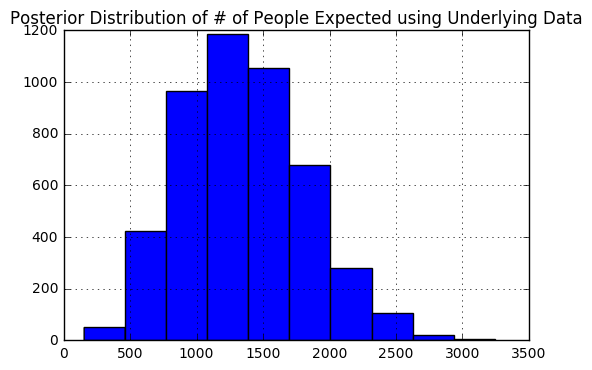

Sign-up 95% quantile interval 553-2348
Expected # of people: 1355


In [113]:
# This can be done with a for loop
signups = list()

for p in post_distrib:
    signups.append(np.random.binomial(num_future, p))

yvals = pd.Series(signups)
yvals.hist()

plt.title('Posterior Distribution of # of People Expected using Underlying Data')
plt.show()

print('Sign-up 95%% quantile interval %d-%d' % tuple(yvals.quantile([.025, .975]).values))
print('Expected # of people: %d' %yvals.mean())
